<h2>Non-Interacting Particles assignment 2</h2>

This notebook is a continuation of last week's assignment, where we calculated the distribution of energy for given microstates.
This week we plot the energy as a funcion of temperature, both by enumerating over every possible state and by analytically producing a solution.

The system we look at is a system of 10 independent particles, with possible energy levels of -1, +1 and +2.

We compute the energy for each of the 3^10 possible states.

In [106]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Generating all possible states</h3>

When we generate the states, we label them from 0, so the state of a single particle is its label, with a defined energy level. 

(A particle in state 3 may have an energy of -1, for example)

In [108]:
#numStates ** numParticles is the number of possible states
#This method converts the index into a number in base numStates with numParticles digits
def getState(index, numParticles, numStates):
    microstate = np.zeros(numParticles)

    for i in range(np.size(microstate)):
        microstate[np.size(microstate) - i - 1] = index % numStates
        index -= index % numStates
        index = index // numStates

    return microstate    

In [109]:
#Testing this with binary
#for i in range(0, 256):
#    print(getState(i, 8, 2))

#testing in base 3
for i in range(0, 9):
    print(getState(i, 2, 3))

[0. 0.]
[0. 1.]
[0. 2.]
[1. 0.]
[1. 1.]
[1. 2.]
[2. 0.]
[2. 1.]
[2. 2.]


<h3>Computing the energies</h3>

In [111]:
def getEnergy(energyLevels, microstate):
    energy = 0
    for state in microstate:
        energy += energyLevels[state]

    return energy

In [112]:
#Test for system of 8 particles,with states -1 and +1
for i in range(256):
    microstate = getState(i, 4, 2)

    energy = getEnergy({0:-1, 1:1}, microstate)
    print(energy)

-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4
-4
-2
-2
0
-2
0
0
2
-2
0
0
2
0
2
2
4


<h3>Average energy</h3>

We first compute the average energy for a given temperature analytycally then numerically.

We use 10 particles, with possible energies +1 and -1.

In [138]:
n = 10

#Analytical method
temperature = np.arange(1, 20, 0.01)
avgEnergyAnalytic = - n * np.tanh(1/temperature)

#Numerical method
#Apply for a range of temperatures
discreetTemps = np.arange(1, 20, 1)
discreetEnergies = np.zeros(len(discreetTemps))
for j in range(len(discreetTemps)):
    #Compute Z and E
    Z = 0
    E = 0

    for i in range(2 ** n):
        microstate = getState(i, n, 2)
        energy = getEnergy({0:-1, 1:1}, microstate)
    
        Z += np.exp(-energy / discreetTemps[j])
        E += energy * np.exp(-energy / discreetTemps[j])

    #Divide by Z
    E = E / Z
    discreetEnergies[j] = E
    
    


Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee

Teehee



Text(0, 0.5, 'Average Energy / A.U.')

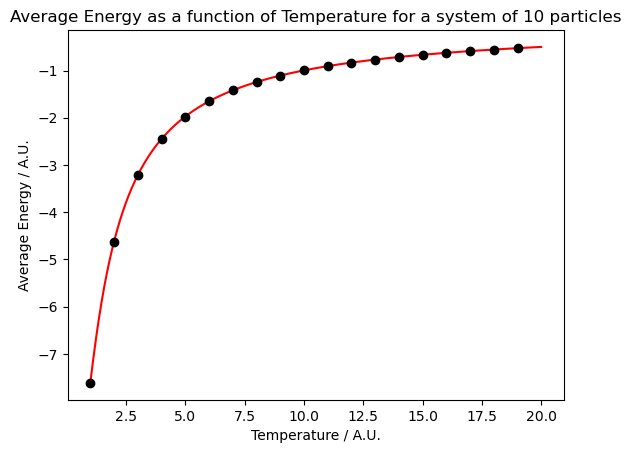

In [154]:
plt.plot(temperature, avgEnergyAnalytic, 'r')
plt.plot(discreetTemps, discreetEnergies, 'ko')

plt.title("Average Energy as a function of Temperature for a system of 10 particles")
plt.xlabel("Temperature / A.U.")
plt.ylabel("Average Energy / A.U.")

Text(0.5, 1.0, 'Possible Energy Levels for a 2 State System')

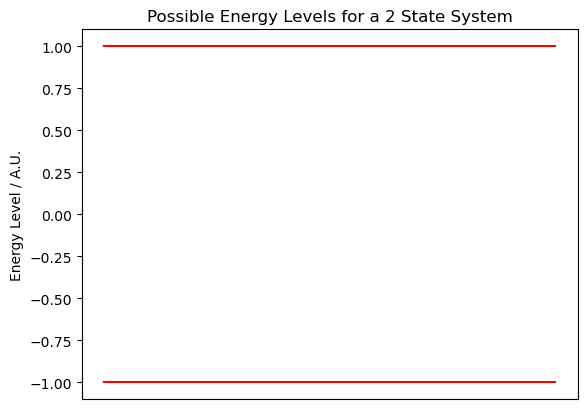

In [168]:
#Energy level diagram
state1 = np.ones(10)
state2 = -np.ones(10)

plt.plot(state1, 'r', label="State +1")
plt.plot(state2, 'r',label="State -1")
plt.xticks([])
plt.ylabel("Energy Level / A.U.")
plt.title("Possible Energy Levels for a 2 State System")